In [1]:
import MDAnalysis as mda
import pytim
from pytim.datafiles import MICELLE_PDB
import nglview

u = mda.Universe(MICELLE_PDB)
g = u.select_atoms('resname DPC')


In [2]:
interface = pytim.WillardChandler(u, group=g, mesh=1.5, alpha=3.0)
interface.writecube('data.cube')

In [3]:
view = nglview.show_mdanalysis(u.atoms) # the atoms, this will be component_0 in nglview
view.add_component('data.cube') # the density data, this will be component_1 in nglview
 

In [4]:
view.clear() # looks like this is needed in order for view._display_image() to work correctly 
# let's center the view on our atoms, and draw them as spheres  
view.component_0.center()
view.component_0.add_spacefill(selection='DPC')

# let's add a transparent, red representation for the isodensity surface
view.component_1.add_surface(color='red',isolevelType="value",isolevel=0.5,opacity=0.6) 

# add a nice simulation box
view.add_unitcell() 

In [5]:
view.display()

In [6]:
view.render_image()

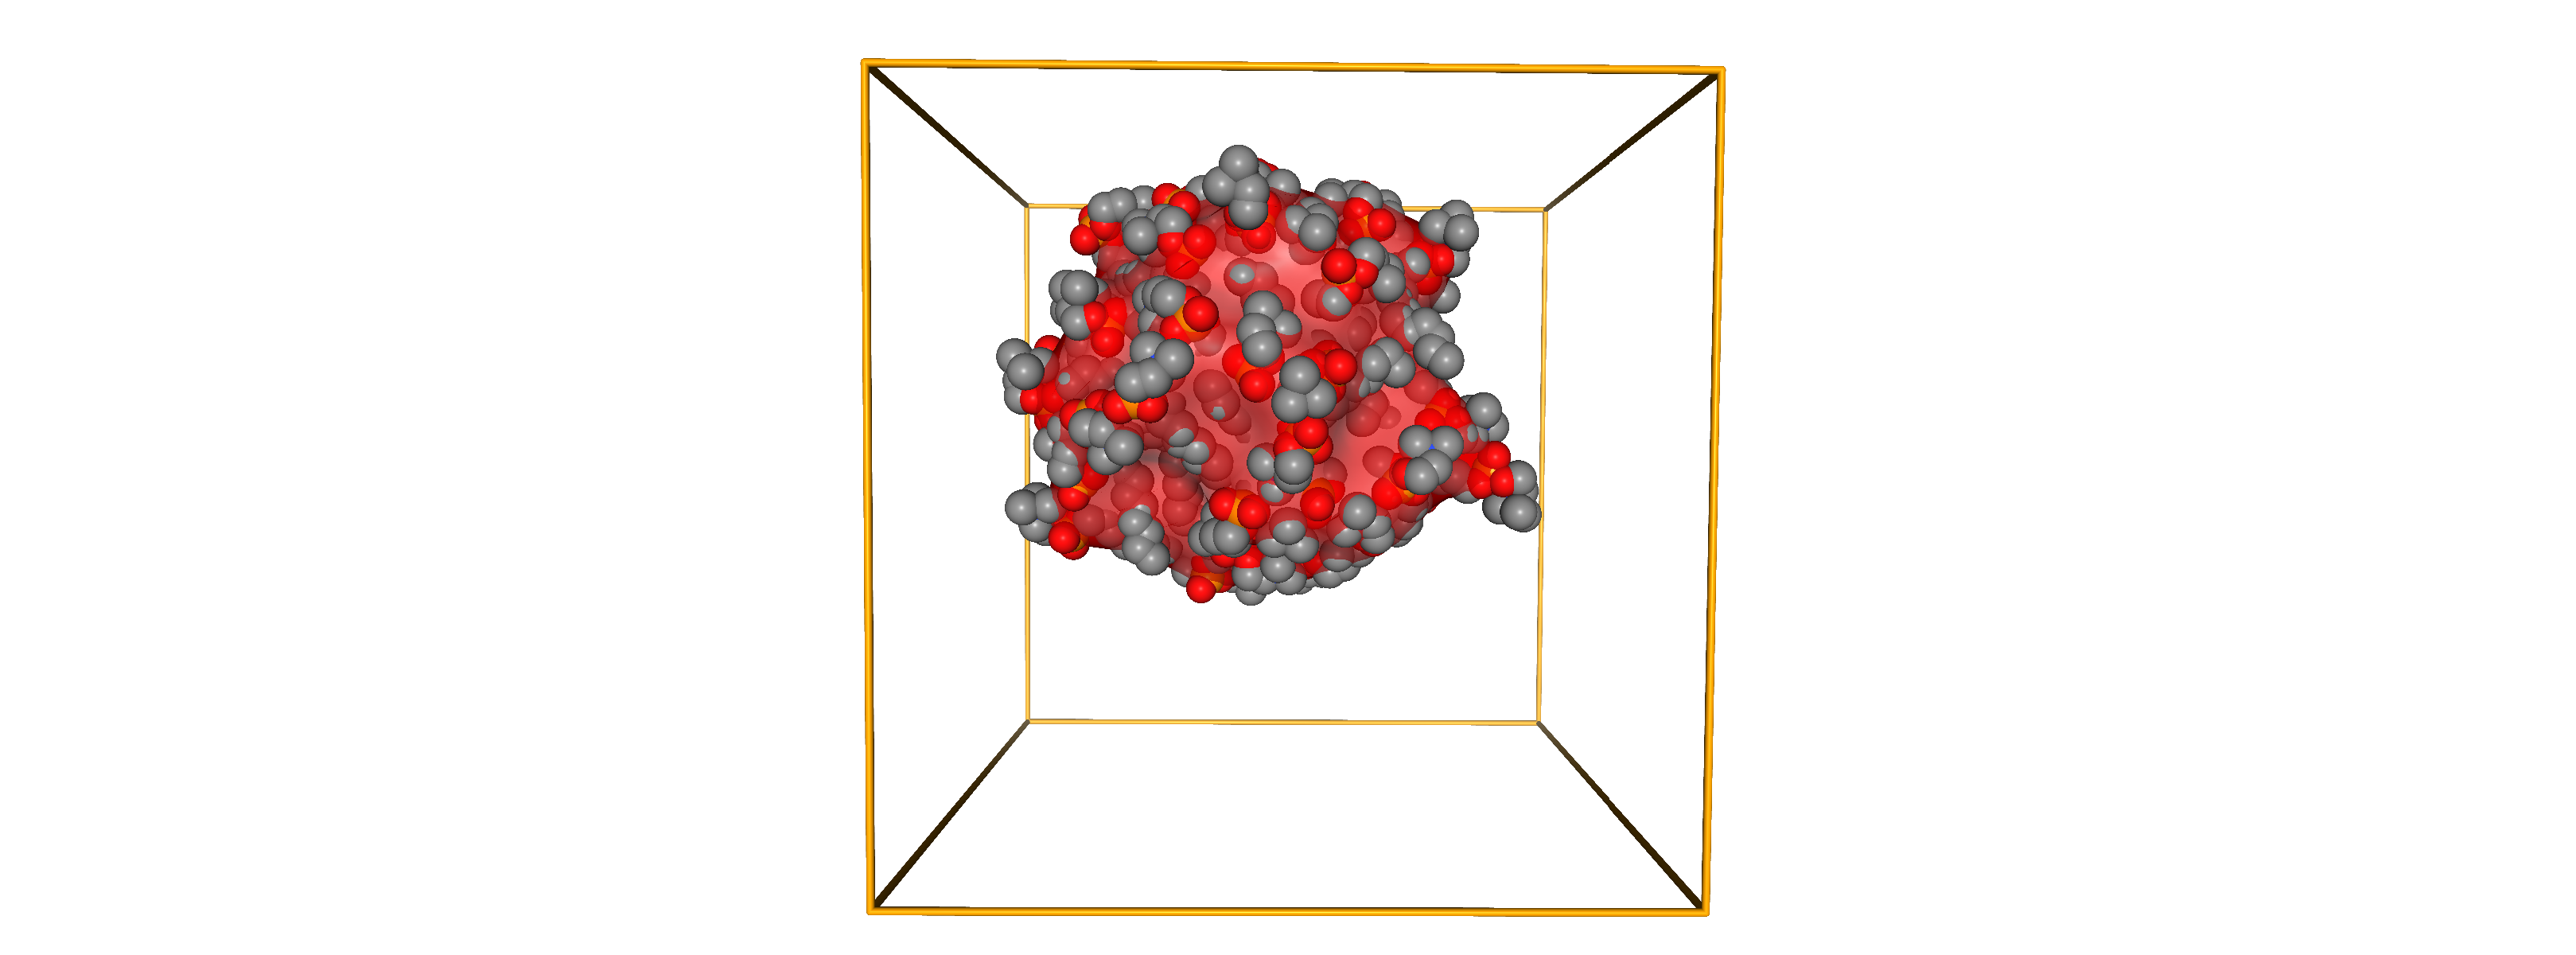

In [7]:
view._display_image()